In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

def type_of_pair(i1, i2):
    if (i1 < 200) and (i2 < 200):
        return "type one"
    if (i1 >= 200) and (i2 >= 200):
        return "type two"
    return "cross"

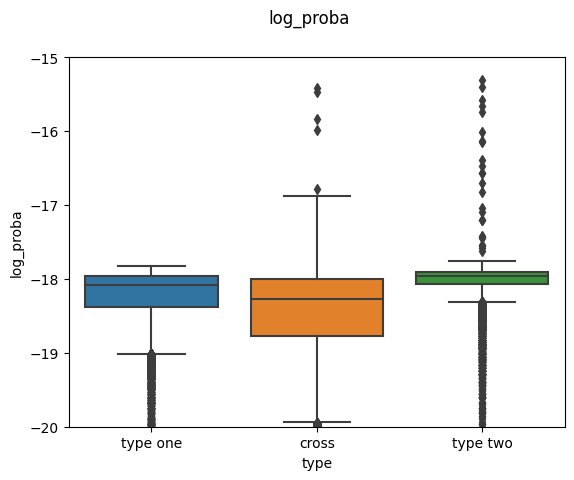

Text(0.5, 0.98, 'pairing_size')

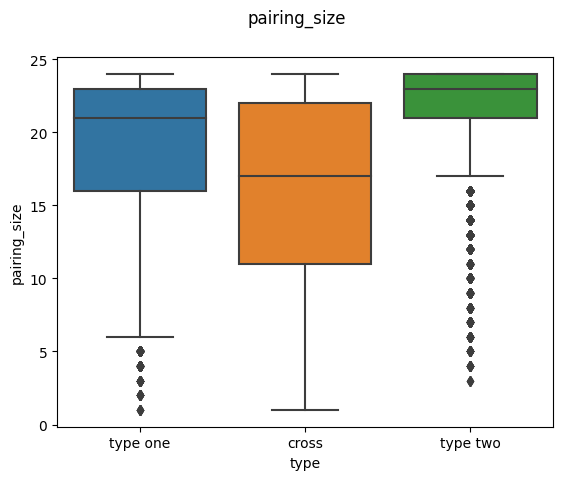

In [3]:
df = pd.read_csv("../../test_results_biodata/seq2seq_results.csv", sep=';', header=None)
df.columns = ["seq_1", "seq_2", "proba", "pairing_size", "pairing"]
df['log_proba'] = np.log(df['proba'])
df['type'] = df.apply(lambda row: type_of_pair(row["seq_1"], row["seq_2"]), axis=1)
sns.boxplot(data=df, x='type', y='log_proba')
plt.ylim(-20, -15)
plt.suptitle("log_proba")
plt.show()

sns.boxplot(data=df, x='type', y='pairing_size')
plt.suptitle("pairing_size")

<Axes: xlabel='None-seq_2', ylabel='seq_1'>

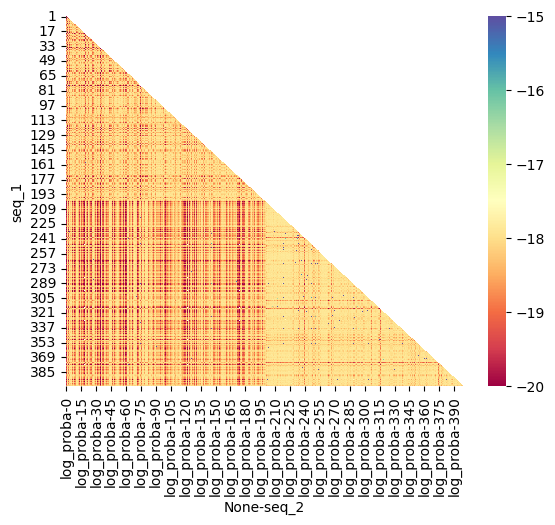

In [10]:
mat = pd.pivot_table(df, values=['log_proba'], columns=['seq_2'], index=['seq_1'])
sns.heatmap(mat, vmin=-20, vmax=-15, cmap="Spectral")

<Axes: xlabel='None-seq_2', ylabel='seq_1'>

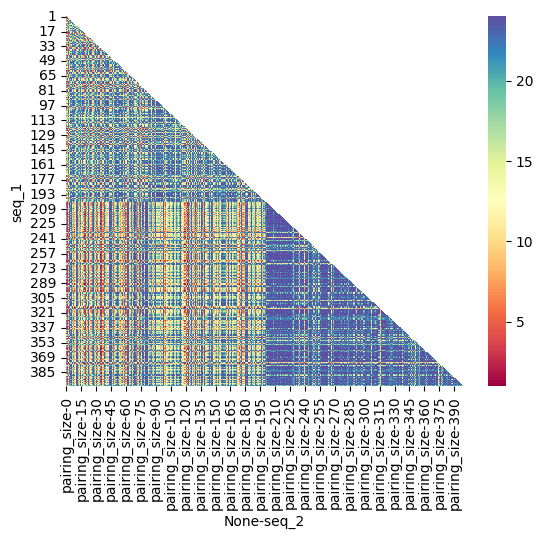

In [11]:
mat = pd.pivot_table(df, values=['pairing_size'], columns=['seq_2'], index=['seq_1'])
sns.heatmap(mat, cmap="Spectral")